In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("C:/Users/prath/Downloads/Housing.csv") 

In [48]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [49]:
df = df.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus'],axis=1)


In [50]:
df

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


In [51]:
df['Total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['stories']

In [52]:
df

,price,area,bedrooms,bathrooms,stories,Total_rooms
0,13300000,7420,4,2,3,9
1,12250000,8960,4,4,4,12
2,12250000,9960,3,2,2,7
3,12215000,7500,4,2,2,8
4,11410000,7420,4,1,2,7
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,4
541,1767150,2400,3,1,1,5
542,1750000,3620,2,1,1,4
543,1750000,2910,3,1,1,5


In [53]:
df = df.drop(columns=['bedrooms','bathrooms','stories'],axis=1)

In [54]:
df

,price,area,Total_rooms
0,13300000,7420,9
1,12250000,8960,12
2,12250000,9960,7
3,12215000,7500,8
4,11410000,7420,7
...,...,...,...
540,1820000,3000,4
541,1767150,2400,5
542,1750000,3620,4
543,1750000,2910,5


In [55]:
x = df.drop('price', axis=1).values   # features
y = df['price'].values.flatten()      # target

In [56]:
x = (x - x.mean(axis=0)) / x.std(axis=0)

In [57]:
# Normalize target
y_mean, y_std = y.mean(), y.std()
y_scaled = (y - y_mean) / y_std

In [58]:
def mean_squared_error(y_test,y_predict):
    cost = np.sum((y_test-y_predict)**2)
    return cost

In [59]:
## Gradient Descent (Simple)

In [60]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def gradient_descent(x, y, epochs=1000, learn_rate=0.001):
    n_samples, n_features = x.shape
    
    weights = np.zeros(n_features)   
    bias = 0.0                       

    costs = []

    for i in range(epochs):
       
        y_predicted = np.dot(x, weights) + bias
        
        
        current_cost = mean_squared_error(y, y_predicted)
        costs.append(current_cost)

        
        dw = -(2/n_samples) * np.dot(x.T, (y - y_predicted))
        db = -(2/n_samples) * np.sum(y - y_predicted)

       
        weights = weights-(learn_rate * dw)
        bias    = bias-(learn_rate * db)

    plt.figure(figsize=(8,6))
    plt.plot(range(epochs), costs, label="Cost")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Cost")
    plt.title("Cost Reduction over Time")
    plt.legend()
    plt.show()
    
    return weights, bias


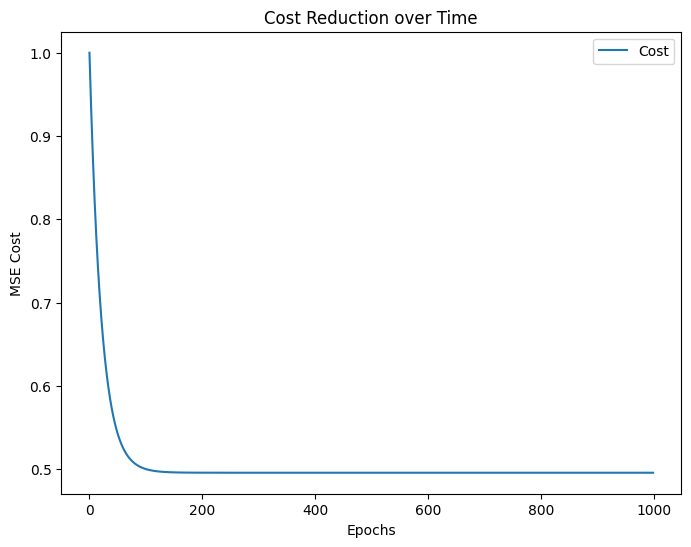

Estimated Weights: [0.45376023 0.47278281]
Estimated Bias: 1.6792276030440498e-16
R² Score: 0.5040537996298703
MSE: 1731906129122.9238


In [61]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y.reshape(-1,1)).flatten()

weights, bias = gradient_descent(x_scaled, y_scaled, epochs=1000, learn_rate=0.01)

y_pred_scaled = np.dot(x_scaled, weights) + bias
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()

print("Estimated Weights:", weights)
print("Estimated Bias:", bias)
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

In [62]:
## Batch Gradient Descent

In [63]:
def predict(x, weights, bias):
    return np.dot(x, weights) + bias

In [64]:
def batch_gradient_descent(x, y, lr=0.01, epochs=1000):
    n_samples, n_features = x.shape
    weights = np.zeros(n_features)
    bias = 0
    costs = []

    for _ in range(epochs):
        y_pred = predict(x, weights, bias)
        error = y - y_pred

        dw = -(2/n_samples) * np.dot(x.T, error)
        db = -(2/n_samples) * np.sum(error)

        weights -= lr * dw
        bias -= lr * db

        costs.append(np.mean(error**2))
    
    return weights, bias, costs


Final Weights: [0.45376023 0.47278281]
Final Bias: 2.78480602492399e-16
Final Cost: 0.49594620037012965


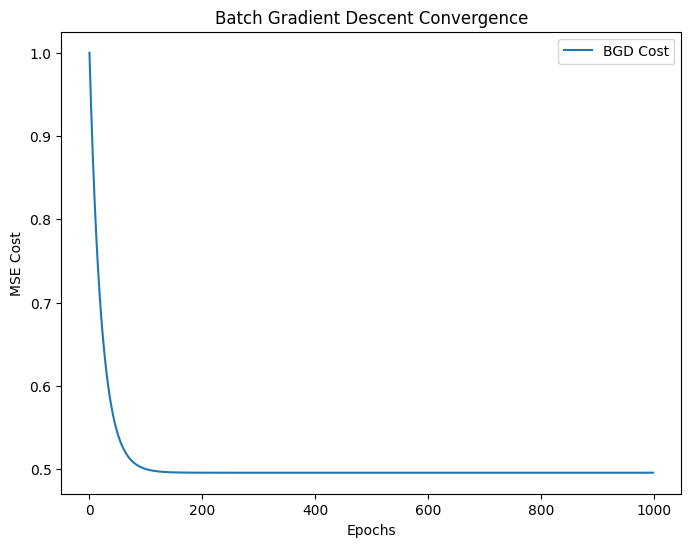

In [65]:
w_bgd, b_bgd, cost_bgd = batch_gradient_descent(x, y_scaled)

print("Final Weights:", w_bgd)
print("Final Bias:", b_bgd)
print("Final Cost:", cost_bgd[-1])

plt.figure(figsize=(8,6))
plt.plot(cost_bgd, label="BGD Cost")
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("Batch Gradient Descent Convergence")
plt.legend()
plt.show()

In [66]:
## Stochastic Gradient Descent

In [4]:
def stochastic_gradient_descent(x, y, lr=0.01, epochs=1000):
    n_samples, n_features = x.shape
    weights = np.zeros(n_features)
    bias = 0
    costs = []

    for epoch in range(epochs):
        for i in range(n_samples):
            idx = np.random.randint(0, n_samples)  
            xi = x[idx:idx+1]
            yi = y[idx]

            y_pred = predict(xi, weights, bias)
            error = yi - y_pred

            dw = -(2) * np.dot(xi.T, error)
            db = -(2) * error

            weights -= lr * dw.flatten()
            bias -= lr * db

       
        y_pred_all = predict(x, weights, bias)
        costs.append(np.mean(y - y_pred_all**2))

    return weights, bias, costs
    


In [5]:
w_sgd, b_sgd, cost_sgd = stochastic_gradient_descent(x, y_scaled)
print("Final Weights:", w_sgd)
print("Final Bias:", b_sgd)
print("Final Cost:", cost_sgd[-1])

plt.figure(figsize=(8,6))
plt.plot(cost_sgd, label="Stochastic Cost")
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("Stochastic Gradient Descent Convergence")
plt.legend()
plt.show()

NameError: name 'x' is not defined

In [69]:
## Mini Batch Gradient Descent

In [70]:
def mini_batch_gradient_descent(x, y, lr=0.01, epochs=1000, batch_size=32):
    n_samples, n_features = x.shape
    weights = np.zeros(n_features)
    bias = 0
    costs = []

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = x[indices]
        y_shuffled = y[indices]

        for start in range(0, n_samples, batch_size):
            end = start + batch_size
            xi = X_shuffled[start:end]
            yi = y_shuffled[start:end]

            y_pred = predict(xi, weights, bias)
            error = yi - y_pred

            dw = -(2/len(xi)) * np.dot(xi.T, error)
            db = -(2/len(xi)) * np.sum(error)

            weights -= lr * dw
            bias -= lr * db

        
        y_pred_all = predict(x, weights, bias)
        costs.append(np.mean((y - y_pred_all)**2))

    return weights, bias, costs



Final Weights: [0.4496985  0.47264428]
Final Bias: 0.009604609999736212
Final Cost: 0.49605516148976386


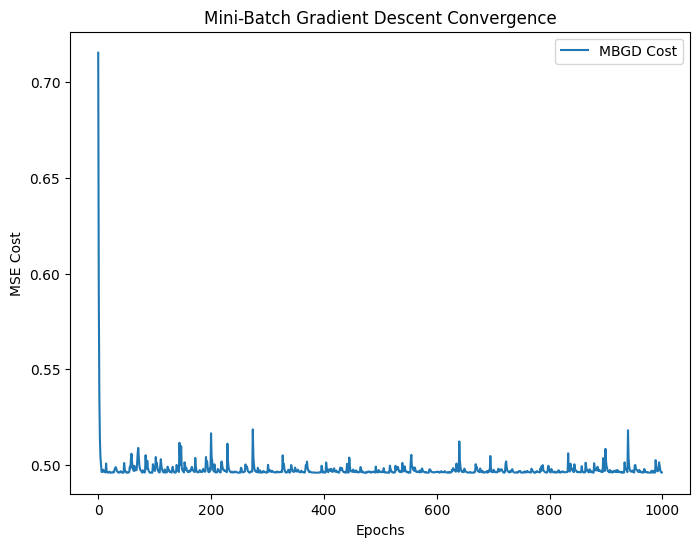

In [71]:
w_mbgd, b_mbgd, cost_mbgd = mini_batch_gradient_descent(x, y_scaled)

print("Final Weights:", w_mbgd)
print("Final Bias:", b_mbgd)
print("Final Cost:", cost_mbgd[-1])

plt.figure(figsize=(8,6))
plt.plot(cost_mbgd, label="MBGD Cost")
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("Mini-Batch Gradient Descent Convergence")
plt.legend()
plt.show()

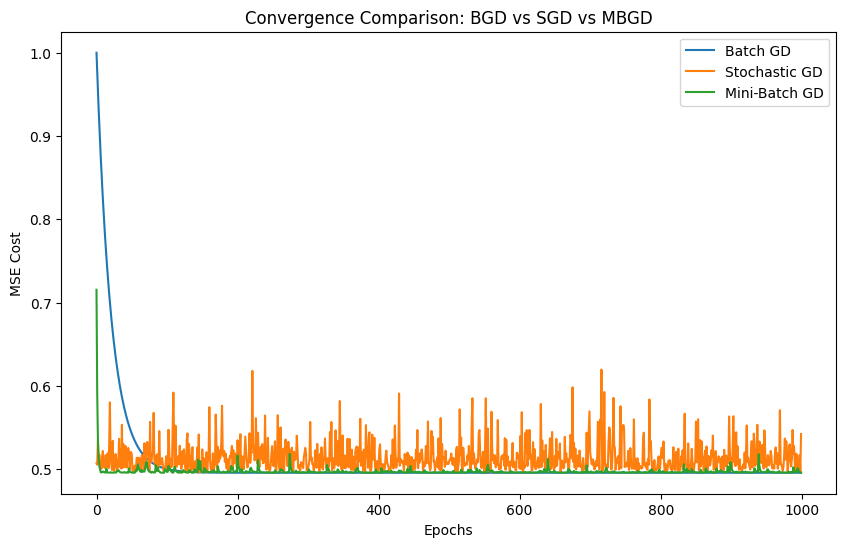

In [72]:

# Plot convergence comparison
plt.figure(figsize=(10,6))
plt.plot(cost_bgd, label="Batch GD")
plt.plot(cost_sgd, label="Stochastic GD")
plt.plot(cost_mbgd, label="Mini-Batch GD")
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("Convergence Comparison: BGD vs SGD vs MBGD")
plt.legend()
plt.show()